# Analysis of Brandeis Computer Science classes
Here we show how to use pandas to analyze the Brandeis course data stored in data/courses

Some questions we can try to answer
* which faculty have taught the most students over the Fall2004-Summer2021 interval
* which departments offer the most courses
* which departments have had the most students
* how have the enrollents by departments changed
* etc, as in PA01

We'll show how to use pivot tables and aggregation to answer some of these.

This notebook shows how to use aggregation with groupby, pivot tables, and how to create new columns by applying some function to other columns.


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

First we read in the data from Fall 2004 to Summer 2021 with minimal info about each course

In [2]:
df = pd.read_csv('data2/classes/courses.csv')
df

,subj,num,suf,format,term,code,inst,title,sec,enr
0,NEJS,188,A,LEC,Fall 2004,1043,"Levy, Avigdor",RISE/DECLINE:OTTOMAN EMP,1,32
1,CHEM,121,A,LEC,Fall 2004,1043,"Foxman, Bruce","INORGANIC CHEM I, LECS.",1,18
2,CHEM,130,A,LEC,Fall 2004,1043,"Yu, Jinquan",ADV ORG. CHEM: STRUCTURE,1,14
3,COMP,1,A,LEC,Fall 2004,1043,"Ruesch, Gordon",COMPOSITION,3,11
4,MUS,118,A,STD,Fall 2004,1043,"Ray, Mary",SENIOR RECITAL I,1,3
...,...,...,...,...,...,...,...,...,...,...
35201,BIOL,26,A,LEC,Summer 2021,1212,"Kosinski-Collins, Melissa",Plant Biology,1,9
35202,ECON,28,B,LEC,Summer 2021,1212,"AlMehdar, Mohammed",The Global Economy,1,4
35203,PHIL,1,A,LEC,Summer 2021,1212,"Lupu, Peter",Introduction to Philosophy,1,3
35204,AAAS,160,B,LEC,Summer 2021,1212,"Plumb, Betsy Loren",If We Must Die: War and Military Service in Af...,1,3


In [3]:
cs = df[df['subj']=='COSI'].copy()
cs

,subj,num,suf,format,term,code,inst,title,sec,enr
63,COSI,171,A,LEC,Fall 2004,1043,"Cohn, Martin",CRYPTOLOGY,1,23
107,COSI,112,A,LEC,Fall 2004,1043,"Pustejovsky, James",THRY/MODELS:INTEL.BEHAVR,1,23
144,COSI,2,A,LEC,Fall 2004,1043,"Hickey, Timothy",INTRO TO COMPUTERS,1,86
403,COSI,31,A,LEC,Fall 2004,1043,"Cherniack, Mitch",COMPUTER STRUCTURES/ORG.,1,34
492,COSI,215,A,SEM,Fall 2004,1043,"Alterman, Richard",ADV.TOPIC:HMAN-CENT COMP,1,10
...,...,...,...,...,...,...,...,...,...,...
34879,COSI,10,A,LEC,Fall 2020,1203,"Tsekourakis, Iraklis",Introduction to Problem Solving in Python,2,67
34969,COSI,10,A,LEC,Fall 2020,1203,"Hickey, Timothy J",Introduction to Problem Solving in Python,3DL,25
35149,COSI,12,B,LEC,Summer 2021,1212,"Golitsyn, Michael",Advanced Programming Techniques in Java,1,11
35171,COSI,152,A,LEC,Summer 2021,1212,"Hickey, Timothy J",Web Application Development,1,18


In [4]:
cs['inst'] = cs['inst'].apply(lambda x: "Hickey, Timothy" if x=="Hickey, Timothy J" else x)

# Finding teachers with the most students
The easiest way to do this is with a groupby it shows the three stages of groupby
1. grouping of rows together based on the value in a column ('inst')
1. projection of those rows into a set of values (what value are we interested in) (enr)
1. aggregation of those values into a single value with some operator from arrays to numbers (sum)

In [5]:
#fac = df.groupby(['inst','subject'])['enr'].agg(sum)
#fac
fac = cs.groupby(['inst','subj'])
fac = fac['enr'].agg([sum, np.mean, np.max,len])
fac = fac.sort_values(ascending=False,by='len')
fac.head(20)



,,sum,mean,amax,len
inst,subj,,,,
"Hickey, Timothy",COSI,3795,48.653846,169,78
"Di Lillo, Antonella",COSI,4357,65.029851,149,67
"Salas, R. Pito",COSI,1025,28.472222,92,36
"Storer, James",COSI,1308,40.875000,140,32
"Mairson, Harry",COSI,1156,36.125000,108,32
"Pustejovsky, James",COSI,773,24.935484,81,31
"Alterman, Richard",COSI,1100,35.483871,116,31
"Meteer, Marie",COSI,435,15.000000,32,29
"Hong, Pengyu",COSI,854,29.448276,77,29


## Sorting the Series
We can sort the values if we want (and here I am then reversing them by iterating with a step of -1 through the array) and we can use .head(N) and .tail(N) to look at either end of the sorted series.

In [6]:
fac = fac.sort_values(ascending=False,by='sum')
fac.head(20)


,,sum,mean,amax,len
inst,subj,,,,
"Di Lillo, Antonella",COSI,4357,65.029851,149,67
"Hickey, Timothy",COSI,3795,48.653846,169,78
"Cherniack, Mitch",COSI,1547,55.250000,154,28
"Storer, James",COSI,1308,40.875000,140,32
"Mairson, Harry",COSI,1156,36.125000,108,32
"Alterman, Richard",COSI,1100,35.483871,116,31
"Salas, R. Pito",COSI,1025,28.472222,92,36
"Papaemmanouil, Olga",COSI,962,48.100000,134,20
"Shrira, Liuba",COSI,938,36.076923,132,26


In [7]:
fac.head(50)

,,sum,mean,amax,len
inst,subj,,,,
"Di Lillo, Antonella",COSI,4357,65.029851,149,67
"Hickey, Timothy",COSI,3795,48.653846,169,78
"Cherniack, Mitch",COSI,1547,55.250000,154,28
"Storer, James",COSI,1308,40.875000,140,32
"Mairson, Harry",COSI,1156,36.125000,108,32
"Alterman, Richard",COSI,1100,35.483871,116,31
"Salas, R. Pito",COSI,1025,28.472222,92,36
"Papaemmanouil, Olga",COSI,962,48.100000,134,20
"Shrira, Liuba",COSI,938,36.076923,132,26


In [8]:
df

,subj,num,suf,format,term,code,inst,title,sec,enr
0,NEJS,188,A,LEC,Fall 2004,1043,"Levy, Avigdor",RISE/DECLINE:OTTOMAN EMP,1,32
1,CHEM,121,A,LEC,Fall 2004,1043,"Foxman, Bruce","INORGANIC CHEM I, LECS.",1,18
2,CHEM,130,A,LEC,Fall 2004,1043,"Yu, Jinquan",ADV ORG. CHEM: STRUCTURE,1,14
3,COMP,1,A,LEC,Fall 2004,1043,"Ruesch, Gordon",COMPOSITION,3,11
4,MUS,118,A,STD,Fall 2004,1043,"Ray, Mary",SENIOR RECITAL I,1,3
...,...,...,...,...,...,...,...,...,...,...
35201,BIOL,26,A,LEC,Summer 2021,1212,"Kosinski-Collins, Melissa",Plant Biology,1,9
35202,ECON,28,B,LEC,Summer 2021,1212,"AlMehdar, Mohammed",The Global Economy,1,4
35203,PHIL,1,A,LEC,Summer 2021,1212,"Lupu, Peter",Introduction to Philosophy,1,3
35204,AAAS,160,B,LEC,Summer 2021,1212,"Plumb, Betsy Loren",If We Must Die: War and Military Service in Af...,1,3


# Restricting to a time interval
Let's do the same but just look for the past 4 years, i.e. from Fall2017 to Summer 2021 which are the codes 1173 to 1212.


In [9]:
df2 = cs[cs['code']>=1193]
df2
#islater = df['code']>= 1173
#df[islater]

,subj,num,suf,format,term,code,inst,title,sec,enr
2070,COSI,119,A,LAB,Fall 2019,1193,"Salas, R. Pito",AUTONOMOUS ROBOTICS,1,6
2071,COSI,119,A,LAB,Fall 2019,1193,"Salas, R. Pito",AUTONOMOUS ROBOTICS,2,8
2117,COSI,45,A,LAB,Spring 2020,1201,"Wittenberg, William",EFF COMM COMPUTER SCIENTISTS,1,10
14616,COSI,190,A,LEC,Fall 2019,1193,"Mairson, Harry",PROGRAMMING LANG.THEORY,1,11
14617,COSI,177,A,LEC,Fall 2019,1193,"Abi-Antoun, Marwan",SCIENTIFIC DATA PROCESSING,1,22
...,...,...,...,...,...,...,...,...,...,...
34879,COSI,10,A,LEC,Fall 2020,1203,"Tsekourakis, Iraklis",Introduction to Problem Solving in Python,2,67
34969,COSI,10,A,LEC,Fall 2020,1203,"Hickey, Timothy",Introduction to Problem Solving in Python,3DL,25
35149,COSI,12,B,LEC,Summer 2021,1212,"Golitsyn, Michael",Advanced Programming Techniques in Java,1,11
35171,COSI,152,A,LEC,Summer 2021,1212,"Hickey, Timothy",Web Application Development,1,18


## aggregate by summing the enrollments for each subject

In [10]:
insts = df2.groupby(['inst'])['enr'].agg(sum)
insts = insts.sort_values(ascending=False)
insts.head(20)
                     


inst
Hickey, Timothy         733
Di Lillo, Antonella     603
Cherniack, Mitch        347
DiLillo, Antonella      340
Tsekourakis, Iraklis    322
Papaemmanouil, Olga     235
Hong, Pengyu            199
Mairson, Harry          153
Lignos, Constantine     146
Pustejovsky, James      136
Pollack, Jordan         122
Liu, Hongfu             119
Xue, Nianwen            116
Salas, Ralph            115
Alterman, Richard       114
Salas, R. Pito          105
Storer, James A         100
Storer, James            62
Abi-Antoun, Marwan       40
Wellner, Benjamin        33
Name: enr, dtype: int64

# Time series
Now lets try to get time series data and plot the enrollments in a department by year.
Let's first add a new column giving the academic year, so Fall2004 and Spring 2005 and Summer2005 would all be 2004


In [11]:
def code2year(code):
    ''' returns the academic year corresponding to a code'''
    code=str(code)
    year = int("20"+code[1:-1])
    if code[-1]!='3':
        year = year -1
    return year
print(code2year('1051'))



2004


### the original data frame has no 'year' column

In [12]:
df

,subj,num,suf,format,term,code,inst,title,sec,enr
0,NEJS,188,A,LEC,Fall 2004,1043,"Levy, Avigdor",RISE/DECLINE:OTTOMAN EMP,1,32
1,CHEM,121,A,LEC,Fall 2004,1043,"Foxman, Bruce","INORGANIC CHEM I, LECS.",1,18
2,CHEM,130,A,LEC,Fall 2004,1043,"Yu, Jinquan",ADV ORG. CHEM: STRUCTURE,1,14
3,COMP,1,A,LEC,Fall 2004,1043,"Ruesch, Gordon",COMPOSITION,3,11
4,MUS,118,A,STD,Fall 2004,1043,"Ray, Mary",SENIOR RECITAL I,1,3
...,...,...,...,...,...,...,...,...,...,...
35201,BIOL,26,A,LEC,Summer 2021,1212,"Kosinski-Collins, Melissa",Plant Biology,1,9
35202,ECON,28,B,LEC,Summer 2021,1212,"AlMehdar, Mohammed",The Global Economy,1,4
35203,PHIL,1,A,LEC,Summer 2021,1212,"Lupu, Peter",Introduction to Philosophy,1,3
35204,AAAS,160,B,LEC,Summer 2021,1212,"Plumb, Betsy Loren",If We Must Die: War and Military Service in Af...,1,3


### create a new column for the year and the courseid
We can apply the code2year function to each of the integers in the 'code' column to get a new series,
and then assign that series to be a new column 'year' of the df dataframe

In [13]:
cs['year'] = cs['code'].apply(code2year)
cs

,subj,num,suf,format,term,code,inst,title,sec,enr,year
63,COSI,171,A,LEC,Fall 2004,1043,"Cohn, Martin",CRYPTOLOGY,1,23,2004
107,COSI,112,A,LEC,Fall 2004,1043,"Pustejovsky, James",THRY/MODELS:INTEL.BEHAVR,1,23,2004
144,COSI,2,A,LEC,Fall 2004,1043,"Hickey, Timothy",INTRO TO COMPUTERS,1,86,2004
403,COSI,31,A,LEC,Fall 2004,1043,"Cherniack, Mitch",COMPUTER STRUCTURES/ORG.,1,34,2004
492,COSI,215,A,SEM,Fall 2004,1043,"Alterman, Richard",ADV.TOPIC:HMAN-CENT COMP,1,10,2004
...,...,...,...,...,...,...,...,...,...,...,...
34879,COSI,10,A,LEC,Fall 2020,1203,"Tsekourakis, Iraklis",Introduction to Problem Solving in Python,2,67,2020
34969,COSI,10,A,LEC,Fall 2020,1203,"Hickey, Timothy",Introduction to Problem Solving in Python,3DL,25,2020
35149,COSI,12,B,LEC,Summer 2021,1212,"Golitsyn, Michael",Advanced Programming Techniques in Java,1,11,2020
35171,COSI,152,A,LEC,Summer 2021,1212,"Hickey, Timothy",Web Application Development,1,18,2020


In [14]:
cs['courseid'] = cs['num'].apply(str)+cs['suf']
cs

,subj,num,suf,format,term,code,inst,title,sec,enr,year,courseid
63,COSI,171,A,LEC,Fall 2004,1043,"Cohn, Martin",CRYPTOLOGY,1,23,2004,171A
107,COSI,112,A,LEC,Fall 2004,1043,"Pustejovsky, James",THRY/MODELS:INTEL.BEHAVR,1,23,2004,112A
144,COSI,2,A,LEC,Fall 2004,1043,"Hickey, Timothy",INTRO TO COMPUTERS,1,86,2004,2A
403,COSI,31,A,LEC,Fall 2004,1043,"Cherniack, Mitch",COMPUTER STRUCTURES/ORG.,1,34,2004,31A
492,COSI,215,A,SEM,Fall 2004,1043,"Alterman, Richard",ADV.TOPIC:HMAN-CENT COMP,1,10,2004,215A
...,...,...,...,...,...,...,...,...,...,...,...,...
34879,COSI,10,A,LEC,Fall 2020,1203,"Tsekourakis, Iraklis",Introduction to Problem Solving in Python,2,67,2020,10A
34969,COSI,10,A,LEC,Fall 2020,1203,"Hickey, Timothy",Introduction to Problem Solving in Python,3DL,25,2020,10A
35149,COSI,12,B,LEC,Summer 2021,1212,"Golitsyn, Michael",Advanced Programming Techniques in Java,1,11,2020,12B
35171,COSI,152,A,LEC,Summer 2021,1212,"Hickey, Timothy",Web Application Development,1,18,2020,152A


In [15]:
cs

,subj,num,suf,format,term,code,inst,title,sec,enr,year,courseid
63,COSI,171,A,LEC,Fall 2004,1043,"Cohn, Martin",CRYPTOLOGY,1,23,2004,171A
107,COSI,112,A,LEC,Fall 2004,1043,"Pustejovsky, James",THRY/MODELS:INTEL.BEHAVR,1,23,2004,112A
144,COSI,2,A,LEC,Fall 2004,1043,"Hickey, Timothy",INTRO TO COMPUTERS,1,86,2004,2A
403,COSI,31,A,LEC,Fall 2004,1043,"Cherniack, Mitch",COMPUTER STRUCTURES/ORG.,1,34,2004,31A
492,COSI,215,A,SEM,Fall 2004,1043,"Alterman, Richard",ADV.TOPIC:HMAN-CENT COMP,1,10,2004,215A
...,...,...,...,...,...,...,...,...,...,...,...,...
34879,COSI,10,A,LEC,Fall 2020,1203,"Tsekourakis, Iraklis",Introduction to Problem Solving in Python,2,67,2020,10A
34969,COSI,10,A,LEC,Fall 2020,1203,"Hickey, Timothy",Introduction to Problem Solving in Python,3DL,25,2020,10A
35149,COSI,12,B,LEC,Summer 2021,1212,"Golitsyn, Michael",Advanced Programming Techniques in Java,1,11,2020,12B
35171,COSI,152,A,LEC,Summer 2021,1212,"Hickey, Timothy",Web Application Development,1,18,2020,152A


# Group by the year and subject
This creates a new Series with a multi-index containing both year and subject

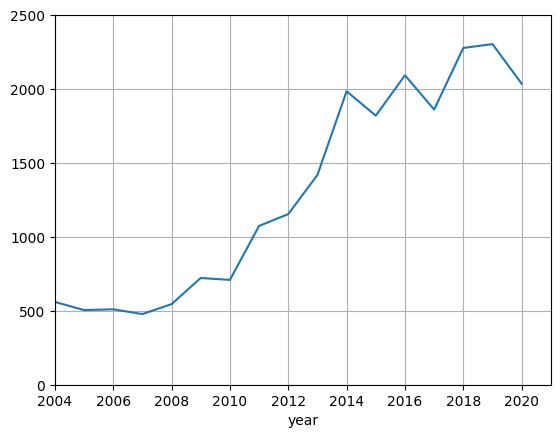

In [16]:
cs_enr = cs.groupby('year')['enr'].agg(sum)
cs_enr.plot()
plt.axis([2004,2021,0,2500])
plt.grid()


In [17]:
classes_enr = cs.groupby(['courseid','year'])['enr'].agg(sum)
classes_enr

courseid  year
101A      2006     22
          2007     32
          2008     19
          2009     19
          2010     27
                 ... 
65A       2013     54
          2014    142
89AJ      2010      1
          2011      4
          2012      1
Name: enr, Length: 511, dtype: int64

In [18]:
classes_enr = classes_enr.reset_index(level=['courseid'])
classes_enr

,courseid,enr
year,,
2006,101A,22
2007,101A,32
2008,101A,19
2009,101A,19
2010,101A,27
...,...,...
2013,65A,54
2014,65A,142
2010,89AJ,1


# Create a Pivot table of enrollments by classes and year
Now we do the usual construction of a pivot table

In [20]:
classes_pt =  pd.pivot_table(classes_enr, values='enr', index=["year"], columns=["courseid"])
classes_pt

courseid,101A,102A,105B,10A,111A,112A,113B,114A,114B,115BJ,...,2A,30A,31A,320A,320B,33B,35A,45A,65A,89AJ
year,,,,,,,,,,,,,,,,,,,,,
2004,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,NaN,NaN,...,86.0,23.0,34.0,NaN,NaN,45.0,26.0,NaN,NaN,NaN
2005,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,22.0,NaN,...,85.0,16.0,18.0,NaN,NaN,24.0,20.0,NaN,NaN,NaN
2006,22.0,NaN,NaN,NaN,NaN,19.0,12.0,NaN,NaN,NaN,...,64.0,15.0,15.0,NaN,NaN,23.0,NaN,NaN,65.0,NaN
2007,32.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,14.0,NaN,...,66.0,21.0,29.0,NaN,NaN,24.0,NaN,NaN,NaN,NaN
2008,19.0,NaN,NaN,NaN,NaN,14.0,17.0,NaN,NaN,NaN,...,96.0,20.0,13.0,NaN,NaN,25.0,NaN,NaN,NaN,NaN
2009,19.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN,16.0,NaN,...,NaN,21.0,20.0,NaN,NaN,NaN,NaN,NaN,99.0,NaN
2010,27.0,NaN,NaN,NaN,12.0,9.0,NaN,NaN,16.0,NaN,...,95.0,18.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2011,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,16.0,NaN,...,89.0,13.0,35.0,6.0,3.0,NaN,NaN,NaN,77.0,4.0
2012,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,NaN,...,101.0,41.0,18.0,11.0,6.0,NaN,NaN,NaN,NaN,1.0


classes_pt['CS0'] = classes_pt['2A'].fillna(0)+ classes_pt['10A'].fillna(0)+ classes_pt['11A'].fillna(0)# Plot selected columns of the pivot table
We can now select a few columns and plot them!

In [21]:
classes_pt['CS0'] = classes_pt['2A'].fillna(0)+ classes_pt['10A'].fillna(0)+ classes_pt['11A'].fillna(0)
classes_pt['31'] = classes_pt['31A'].fillna(0) + classes_pt['131A'].fillna(0)
classes_pt['30'] = classes_pt['30A'].fillna(0) + classes_pt['130A'].fillna(0)
classes_pt['64'] = classes_pt['65A'].fillna(0) + classes_pt['164A'].fillna(0)

FileNotFoundError: [Errno 2] No such file or directory: 'images/introcs.png'

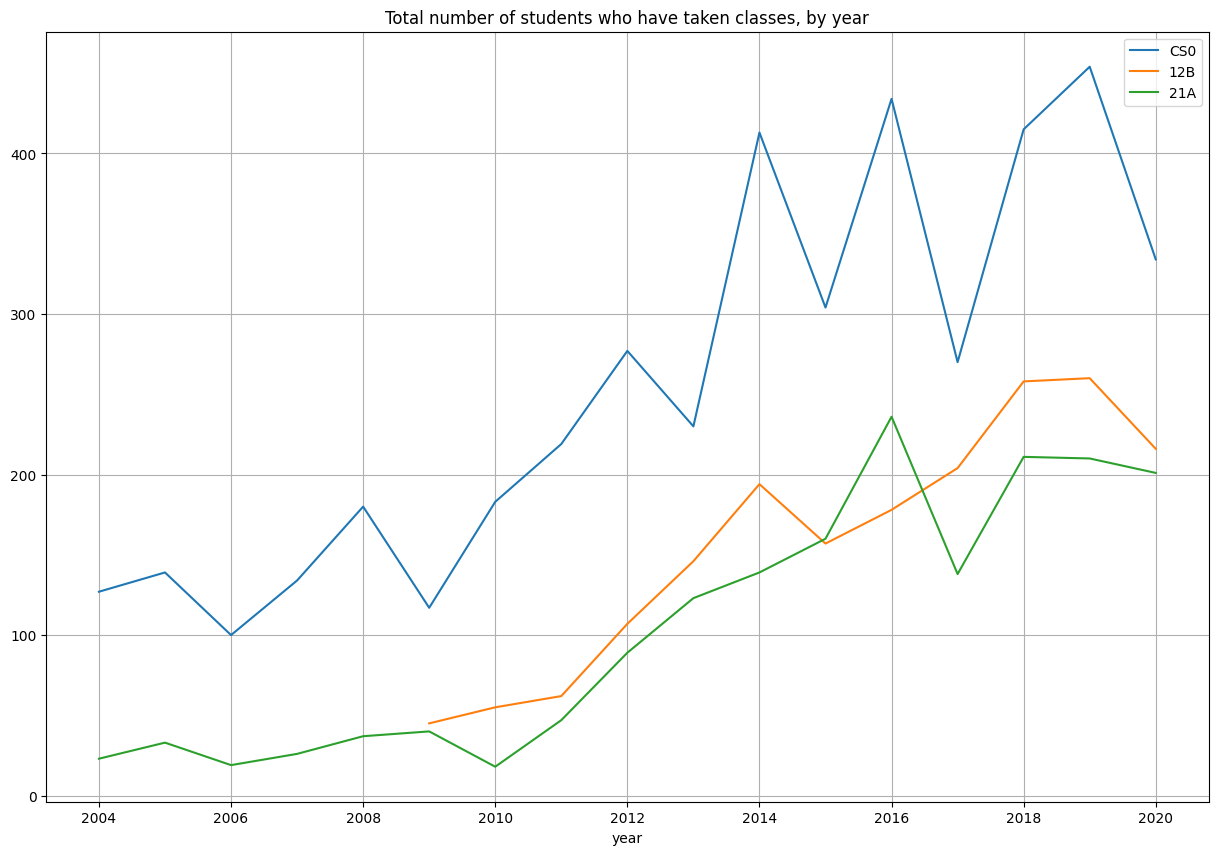

In [22]:
classes_pt[['CS0','12B','21A']].plot(figsize=(15,10))
plt.legend()
plt.grid()
plt.title('Total number of students who have taken classes, by year')
plt.savefig('images/introcs.png')

Text(0.5, 1.0, 'Total number of students who have taken classes, by year')

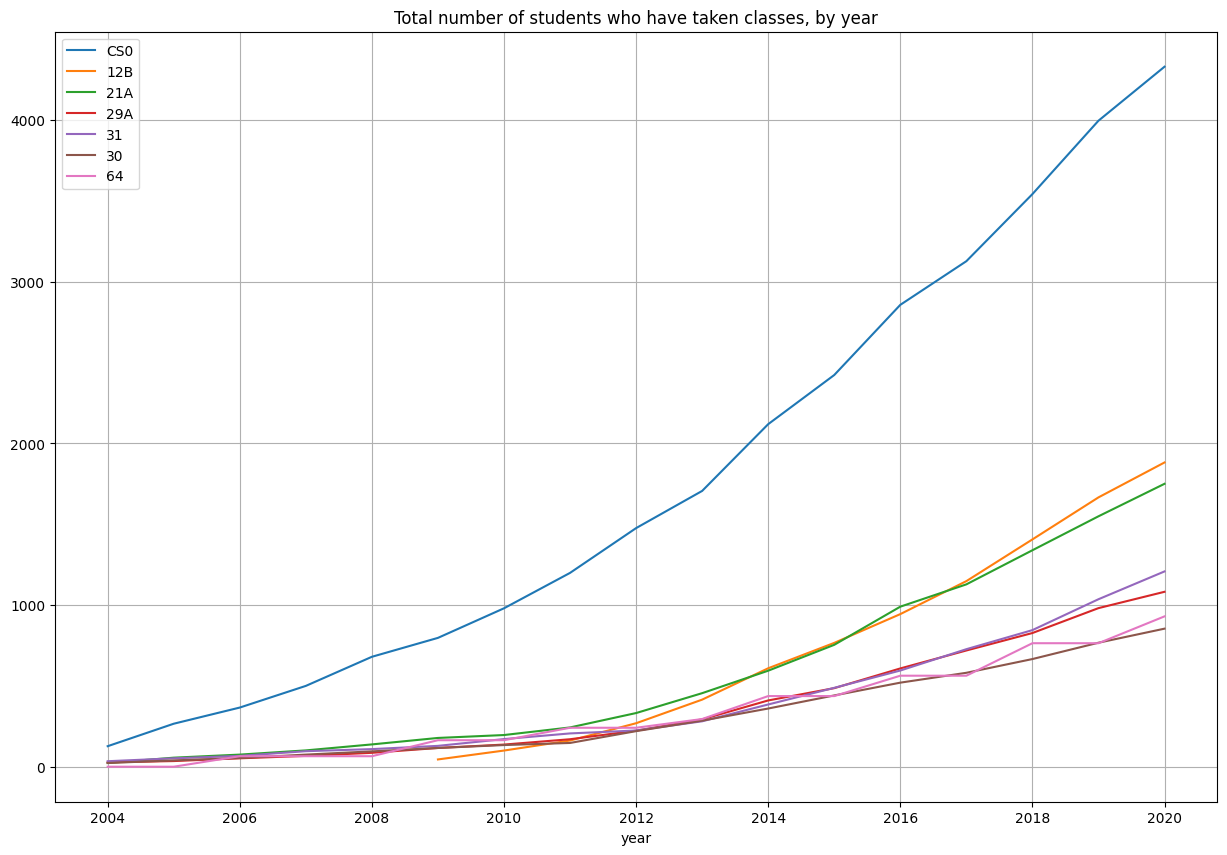

In [23]:
classes_pt[['CS0','12B','21A','29A','31','30','64']].cumsum().plot(figsize=(15,10))
plt.legend()
plt.grid()
plt.title('Total number of students who have taken classes, by year')

## Most popular Computer Science courses at Brandeis

In [ ]:
classes_pt

In [ ]:
df2 = cs[cs['code']>1042]
courses = df2.groupby(['courseid','title'])['enr'].agg(sum)
courses.sort_values(inplace=True, ascending=False)
courses

In [ ]:
fac = cs.groupby('courseid')
fac = fac['enr'].agg([sum])
fac = fac.sort_values(ascending=False, by='sum').head(40)
fac

In [ ]:
pc1 = cs.groupby('courseid')['inst'].agg(list).sort_values(ascending=False)
pc2 = pc1.apply(lambda x: len(x))
pc = pd.DataFrame([pc1,pc2])
pc